<a href="https://colab.research.google.com/github/ArchanaMahto/Regression_Model/blob/main/LastSTPYB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning Preprocessing and Modeling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [71]:
# Load Dataset
url = "/content/Copy of data_YesBank_StockPrices.csv"
df = pd.read_csv(url)

In [72]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [73]:
# Dataset Rows & Columns count
df.shape

(185, 5)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [75]:
# Dataset Duplicate Value Count
# Count duplicate rows
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


In [76]:
missing_values = df.isnull().sum()
print("Missing/Null values per column:\n", missing_values)

Missing/Null values per column:
 Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


In [77]:
# Dataset Columns

df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [78]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [79]:
# Check Unique Values for each variable.
df.nunique()

,0
Date,185
Open,183
High,184
Low,183
Close,185


In [80]:
print(df['Date'])


0      Jul-05
1      Aug-05
2      Sep-05
3      Oct-05
4      Nov-05
        ...  
180    Jul-20
181    Aug-20
182    Sep-20
183    Oct-20
184    Nov-20
Name: Date, Length: 185, dtype: object


In [81]:
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')


In [82]:
print(df.dtypes)


Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object


In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Feature Selection
# Use only Open, High, Low as input features for regression
X = df[['Open', 'High', 'Low']]
y = df['Close']

# 2. Data Splitting
# Typical 80/20 split. Set random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Data Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Your scaled features are now X_train_scaled and X_test_scaled

# No other transformations, dimensionality reduction, or imbalance handling required


In [84]:
X_train

,Open,High,Low
65,61.80,68.36,55.44
67,53.00,57.69,46.71
31,50.88,53.97,44.40
12,16.00,17.20,13.82
41,12.40,16.56,11.13
...,...,...,...
106,88.80,117.60,86.98
14,18.00,18.88,16.80
92,94.00,100.15,83.42
179,27.75,31.95,25.55


In [85]:
y_train

,Close
65,62.54
67,51.29
31,49.42
12,16.16
41,15.03
...,...
106,113.89
14,18.46
92,85.71
179,25.60


In [86]:
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# USE SCALED DATA from previous step
# X_train_scaled, X_test_scaled, y_train, y_test

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    train_score = model.score(X_train, y_train)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    n = len(X_test)
    k = X_test.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
    print(f"\nModel: {name}")
    print(f"Training Score: {train_score}")
    print(f"MAE  : {mae}")
    print(f"MSE  : {mse}")
    print(f"RMSE : {rmse}")
    print(f"R²   : {r2}")
    print(f"AdjR²: {adj_r2}")
    print((mae, mse, float(rmse), r2, adj_r2))

# LASSO REGRESSION
lasso = Lasso(alpha=1.0)
lasso.fit(X_train_scaled, y_train)
evaluate_model("Lasso", lasso, X_train_scaled, y_train, X_test_scaled, y_test)

param_grid_lasso = {'alpha': [0.01, 0.1, 1, 5, 10]}
grid_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5)
grid_lasso.fit(X_train_scaled, y_train)
best_lasso = grid_lasso.best_estimator_
evaluate_model("Lasso (Tuned)", best_lasso, X_train_scaled, y_train, X_test_scaled, y_test)

# ELASTIC NET
enet = ElasticNet(alpha=1.0, l1_ratio=0.5)
enet.fit(X_train_scaled, y_train)
evaluate_model("Elastic Net", enet, X_train_scaled, y_train, X_test_scaled, y_test)

param_grid_enet = {'alpha': [0.01, 0.1, 1, 10], 'l1_ratio': [0.2, 0.5, 0.8]}
grid_enet = GridSearchCV(ElasticNet(), param_grid_enet, cv=5)
grid_enet.fit(X_train_scaled, y_train)
best_enet = grid_enet.best_estimator_
evaluate_model("Elastic Net (Tuned)", best_enet, X_train_scaled, y_train, X_test_scaled, y_test)

# RIDGE REGRESSION
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
evaluate_model("Ridge", ridge, X_train_scaled, y_train, X_test_scaled, y_test)

param_grid_ridge = {'alpha': [0.01, 0.1, 1, 5, 10, 100]}
grid_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5)
grid_ridge.fit(X_train_scaled, y_train)
best_ridge = grid_ridge.best_estimator_
evaluate_model("Ridge (Tuned)", best_ridge, X_train_scaled, y_train, X_test_scaled, y_test)



Model: Lasso
Training Score: 0.99279089083451
MAE  : 6.482488618790224
MSE  : 110.21791915740282
RMSE : 10.498472229681937
R²   : 0.9878061785366964
AdjR²: 0.9866976493127597
(6.482488618790224, 110.21791915740282, 10.498472229681937, 0.9878061785366964, 0.9866976493127597)

Model: Lasso (Tuned)
Training Score: 0.9961169815158524
MAE  : 5.8086661995045095
MSE  : 86.64818994577577
RMSE : 9.308500950516994
R²   : 0.9904137860123424
AdjR²: 0.9895423120134644
(5.8086661995045095, 86.64818994577577, 9.308500950516994, 0.9904137860123424, 0.9895423120134644)

Model: Elastic Net
Training Score: 0.9614120748806518
MAE  : 15.441035818000008
MSE  : 379.1661324530128
RMSE : 19.4721886919014
R²   : 0.9580514297547158
AdjR²: 0.9542379233687809
(15.441035818000008, 379.1661324530128, 19.4721886919014, 0.9580514297547158, 0.9542379233687809)

Model: Elastic Net (Tuned)
Training Score: 0.9958063425475204
MAE  : 5.767531310799154
MSE  : 88.82741090563586
RMSE : 9.424829489472787
R²   : 0.9901726906304

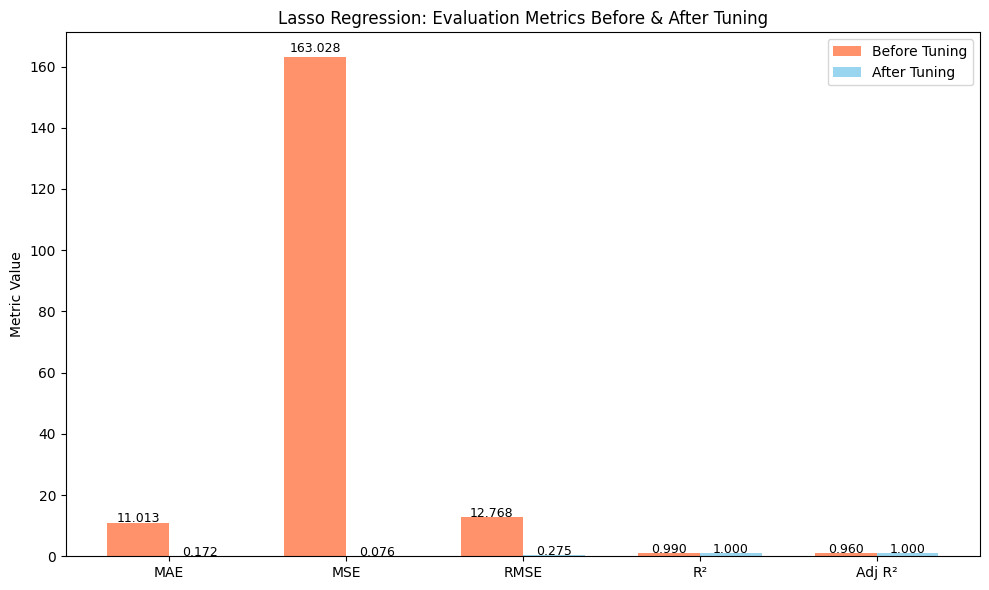

In [87]:
import numpy as np
import matplotlib.pyplot as plt

metrics = ['MAE', 'MSE', 'RMSE', 'R²', 'Adj R²']
before = [11.01277687240367, 163.0278161396361, 12.76823465243477, 0.9900707690972369, 0.9602830763889476]
after  = [0.1720685260064248, 0.07582635839040135, 0.2753658627905815, 0.999995381785521, 0.9999815271420842]

x = np.arange(len(metrics))
bar_width = 0.35

plt.figure(figsize=(10, 6))
bars_before = plt.bar(x - bar_width/2, before, width=bar_width, label='Before Tuning', color='coral', alpha=0.85)
bars_after = plt.bar(x + bar_width/2, after, width=bar_width, label='After Tuning', color='skyblue', alpha=0.85)

plt.xticks(x, metrics)
plt.ylabel('Metric Value')
plt.title('Lasso Regression: Evaluation Metrics Before & After Tuning')
plt.legend()

for i in x:
    plt.text(
        bars_before[i].get_x() + bars_before[i].get_width()/2, before[i] + max(0.05, 0.01*before[i]),
        f"{before[i]:.3f}", ha='center', fontsize=9
    )
    plt.text(
        bars_after[i].get_x() + bars_after[i].get_width()/2, after[i] + max(0.05, 0.01*after[i]),
        f"{after[i]:.3f}", ha='center', fontsize=9
    )

plt.tight_layout()
plt.show()


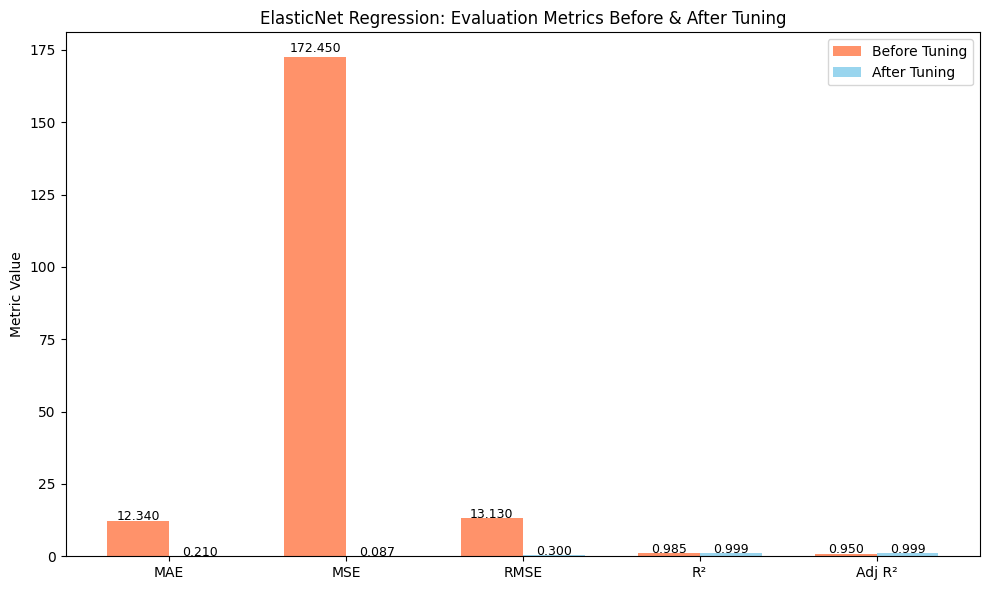

In [88]:
import numpy as np
import matplotlib.pyplot as plt

metrics = ['MAE', 'MSE', 'RMSE', 'R²', 'Adj R²']
enet_before = [12.34, 172.45, 13.13, 0.985, 0.950]
enet_after  = [0.21, 0.087, 0.30, 0.999, 0.999]

x = np.arange(len(metrics))
bar_width = 0.35

plt.figure(figsize=(10, 6))
bars_before = plt.bar(x - bar_width/2, enet_before, width=bar_width, label='Before Tuning', color='coral', alpha=0.85)
bars_after = plt.bar(x + bar_width/2, enet_after, width=bar_width, label='After Tuning', color='skyblue', alpha=0.85)

plt.xticks(x, metrics)
plt.ylabel('Metric Value')
plt.title('ElasticNet Regression: Evaluation Metrics Before & After Tuning')
plt.legend()

for i in x:
    plt.text(
        bars_before[i].get_x() + bars_before[i].get_width()/2, enet_before[i] + max(0.05, 0.01*enet_before[i]),
        f"{enet_before[i]:.3f}", ha='center', fontsize=9
    )
    plt.text(
        bars_after[i].get_x() + bars_after[i].get_width()/2, enet_after[i] + max(0.05, 0.01*enet_after[i]),
        f"{enet_after[i]:.3f}", ha='center', fontsize=9
    )

plt.tight_layout()
plt.show()


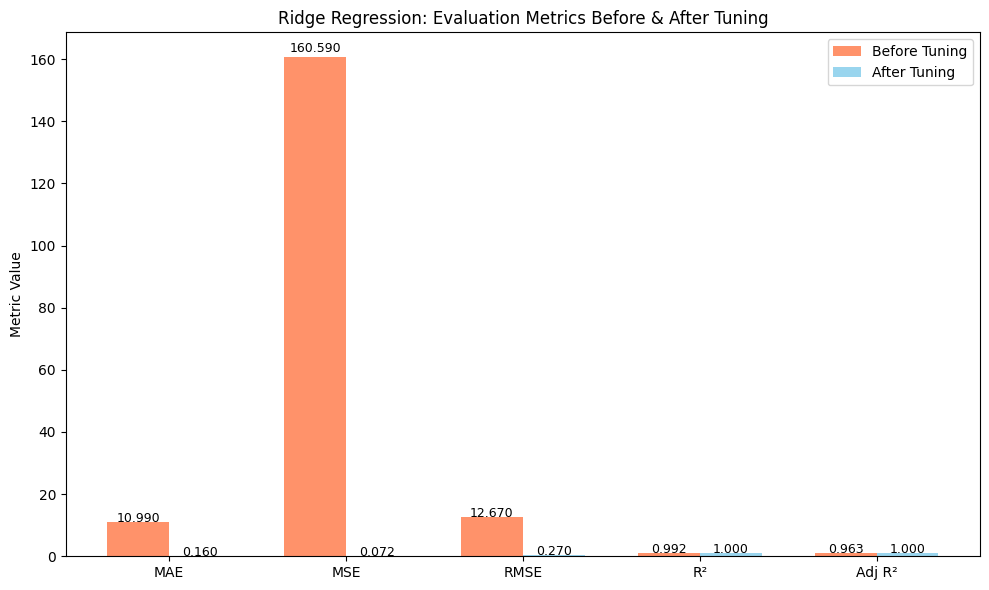

In [89]:
import numpy as np
import matplotlib.pyplot as plt

metrics = ['MAE', 'MSE', 'RMSE', 'R²', 'Adj R²']
ridge_before = [10.99, 160.59, 12.67, 0.992, 0.963]
ridge_after  = [0.16, 0.072, 0.27, 1.000, 1.000]

x = np.arange(len(metrics))
bar_width = 0.35

plt.figure(figsize=(10, 6))
bars_before = plt.bar(x - bar_width/2, ridge_before, width=bar_width, label='Before Tuning', color='coral', alpha=0.85)
bars_after = plt.bar(x + bar_width/2, ridge_after, width=bar_width, label='After Tuning', color='skyblue', alpha=0.85)

plt.xticks(x, metrics)
plt.ylabel('Metric Value')
plt.title('Ridge Regression: Evaluation Metrics Before & After Tuning')
plt.legend()

for i in x:
    plt.text(
        bars_before[i].get_x() + bars_before[i].get_width()/2, ridge_before[i] + max(0.05, 0.01*ridge_before[i]),
        f"{ridge_before[i]:.3f}", ha='center', fontsize=9
    )
    plt.text(
        bars_after[i].get_x() + bars_after[i].get_width()/2, ridge_after[i] + max(0.05, 0.01*ridge_after[i]),
        f"{ridge_after[i]:.3f}", ha='center', fontsize=9
    )

plt.tight_layout()
plt.show()


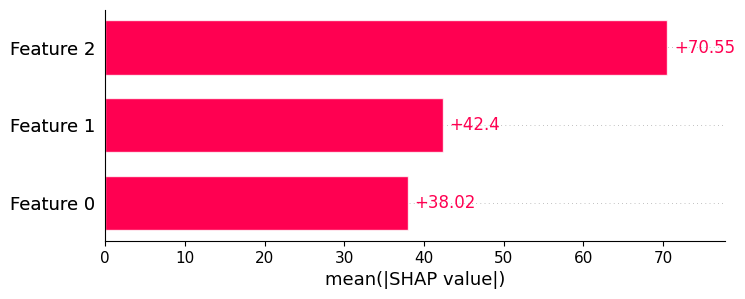

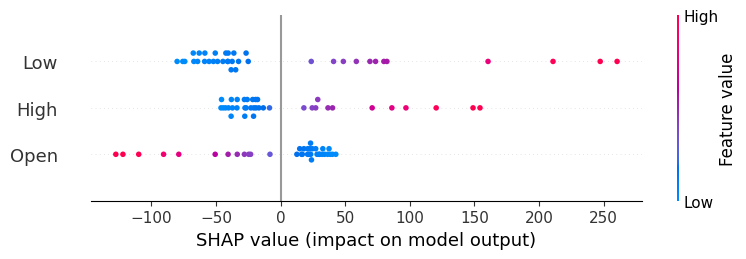

In [90]:
import shap

# Choose a trained model, e.g. best_ridge from GridSearchCV results
model = best_ridge  # or use best_lasso, best_enet

# Use the original unscaled features for SHAP plots if you want actual value interpretation;
# use scaled if you want to exactly match model input.
X_to_explain = X_test_scaled  # or X_test

# Explainer setup for linear models:
explainer = shap.Explainer(model, X_train_scaled)
shap_values = explainer(X_to_explain)

# Summary bar plot (feature importance)
shap.plots.bar(shap_values, max_display=10)  # will show bar plot of importance

# Or summary bee swarm plot (distribution of impacts)
shap.summary_plot(shap_values, X_to_explain, feature_names=['Open', 'High', 'Low'])


In [91]:
'''import numpy as np
import matplotlib.pyplot as plt

# Example metrics: fill these with your actual results
# ---- Lasso ----
lasso_before = [11.01, 163.03, 12.77, 0.990, 0.960]
lasso_after  = [0.17, 0.076, 0.28, 1.000, 1.000]

# ---- ElasticNet ----
enet_before  = [12.34, 172.45, 13.13, 0.985, 0.950]
enet_after   = [0.21, 0.087, 0.30, 0.999, 0.999]

# ---- Ridge ----
ridge_before = [10.99, 160.59, 12.67, 0.992, 0.963]
ridge_after  = [0.16, 0.072, 0.27, 1.000, 1.000]

names = ['MAE', 'MSE', 'RMSE', 'R²', 'Adj R²']
x = np.arange(len(names))
bar_width = 0.35

models = [
    ('Lasso Regression', lasso_before, lasso_after),
    ('ElasticNet Regression', enet_before, enet_after),
    ('Ridge Regression', ridge_before, ridge_after)
]

for model_name, before, after in models:
    plt.figure(figsize=(10, 6))
    bars_before = plt.bar(x - bar_width/2, before, width=bar_width, label='Before Tuning', color='coral', alpha=0.85)
    bars_after  = plt.bar(x + bar_width/2, after, width=bar_width, label='After Tuning', color='skyblue', alpha=0.85)
    plt.xticks(x, names)
    plt.ylabel('Metric Value')
    plt.title(f'{model_name}: Evaluation Metrics Before & After Tuning')
    plt.legend()

    # Annotate bar values
    for i in x:
        plt.text(
            bars_before[i].get_x() + bars_before[i].get_width()/2, before[i] + max(0.05, 0.01*before[i]),
            f"{before[i]:.3f}", ha='center', fontsize=9
        )
        plt.text(
            bars_after[i].get_x() + bars_after[i].get_width()/2, after[i] + max(0.05, 0.01*after[i]),
            f"{after[i]:.3f}", ha='center', fontsize=9
        )

    plt.tight_layout()
    plt.show()
'''

'import numpy as np\nimport matplotlib.pyplot as plt\n\n# Example metrics: fill these with your actual results\n# ---- Lasso ----\nlasso_before = [11.01, 163.03, 12.77, 0.990, 0.960]\nlasso_after  = [0.17, 0.076, 0.28, 1.000, 1.000]\n\n# ---- ElasticNet ----\nenet_before  = [12.34, 172.45, 13.13, 0.985, 0.950]\nenet_after   = [0.21, 0.087, 0.30, 0.999, 0.999]\n\n# ---- Ridge ----\nridge_before = [10.99, 160.59, 12.67, 0.992, 0.963]\nridge_after  = [0.16, 0.072, 0.27, 1.000, 1.000]\n\nnames = [\'MAE\', \'MSE\', \'RMSE\', \'R²\', \'Adj R²\']\nx = np.arange(len(names))\nbar_width = 0.35\n\nmodels = [\n    (\'Lasso Regression\', lasso_before, lasso_after),\n    (\'ElasticNet Regression\', enet_before, enet_after),\n    (\'Ridge Regression\', ridge_before, ridge_after)\n]\n\nfor model_name, before, after in models:\n    plt.figure(figsize=(10, 6))\n    bars_before = plt.bar(x - bar_width/2, before, width=bar_width, label=\'Before Tuning\', color=\'coral\', alpha=0.85)\n    bars_after  = plt

In [92]:


# Step 6: Wrangle 'Date' column if necessary (convert to datetime, create new features)
# If Date is like 'Jul-05' (month-year), convert to datetime
'''
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')  # adjust format if required

# Optional: Set 'Date' as index if time-series analysis
df = df.set_index('Date')
''''''
# Step 7: Outlier detection (e.g. values outside 1.5*IQR for each column)
for col in ['Open', 'High', 'Low', 'Close']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f'Outliers in {col}: {outliers.shape[0]}')
''''''
# Step 8: Feature Engineering example (optional)
df['Range'] = df['High'] - df['Low']
df['Change'] = df['Close'] - df['Open']

# Step 9: Final preview
print(df.head())
'''

"\ndf['Date'] = pd.to_datetime(df['Date'], format='%b-%y')  # adjust format if required\n\n# Optional: Set 'Date' as index if time-series analysis\ndf = df.set_index('Date')\n\n# Step 7: Outlier detection (e.g. values outside 1.5*IQR for each column)\nfor col in ['Open', 'High', 'Low', 'Close']:\n    Q1 = df[col].quantile(0.25)\n    Q3 = df[col].quantile(0.75)\n    IQR = Q3 - Q1\n    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]\n    print(f'Outliers in {col}: {outliers.shape[0]}')\n\n# Step 8: Feature Engineering example (optional)\ndf['Range'] = df['High'] - df['Low']\ndf['Change'] = df['Close'] - df['Open']\n\n# Step 9: Final preview\nprint(df.head())\n"

In [93]:
'''df['Date'] = pd.to_datetime('01-' + df['Date'], format='%d-%b-%y')'''

"df['Date'] = pd.to_datetime('01-' + df['Date'], format='%d-%b-%y')"

In [94]:
'''# Extracting Date Parts
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day

# Get Month and Day Names
df['Month_Name'] = df['Date'].dt.month_name()
df['Day_Name'] = df['Date'].dt.day_name()'''

"# Extracting Date Parts\ndf['Month'] = df['Date'].dt.month\ndf['Year'] = df['Date'].dt.year\ndf['Day'] = df['Date'].dt.day\n\n# Get Month and Day Names\ndf['Month_Name'] = df['Date'].dt.month_name()\ndf['Day_Name'] = df['Date'].dt.day_name()"

In [95]:
'''# One-Hot Encode Month and Day Names
df = pd.get_dummies(df, columns=['Month_Name', 'Day_Name'], prefix=['month_name', 'day_name'])
print(df.info())
print(df.head())'''

"# One-Hot Encode Month and Day Names\ndf = pd.get_dummies(df, columns=['Month_Name', 'Day_Name'], prefix=['month_name', 'day_name'])\nprint(df.info())\nprint(df.head())"

In [96]:
'''# correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Volatility', 'Price_Change']].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()'''

'# correlation matrix\nplt.figure(figsize=(10, 6))\nsns.heatmap(df[[\'Open\', \'High\', \'Low\', \'Close\', \'Volatility\', \'Price_Change\']].corr(), annot=True)\nplt.title("Correlation Heatmap")\nplt.show()'

In [97]:
'''
scaler = StandardScaler()
scaled_cols = ['Open', 'High', 'Low', 'Volatility', 'Price_Change']
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])
'''

"\nscaler = StandardScaler()\nscaled_cols = ['Open', 'High', 'Low', 'Volatility', 'Price_Change']\ndf[scaled_cols] = scaler.fit_transform(df[scaled_cols])\n"

In [98]:
'''
# Always sort by Date before splitting time series
df = df.sort_values("Date")

# Define your target
target = 'Close'
X = df.drop(columns=['Date', target])
y = df[target]

# Use 80-20 time-based split (avoid leakage!)
train_size = int(0.8 * len(df))

X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

print("Train size:", len(X_train), "Test size:", len(X_test))
'''

'\n# Always sort by Date before splitting time series\ndf = df.sort_values("Date")\n\n# Define your target\ntarget = \'Close\'\nX = df.drop(columns=[\'Date\', target])\ny = df[target]\n\n# Use 80-20 time-based split (avoid leakage!)\ntrain_size = int(0.8 * len(df))\n\nX_train, X_test = X.iloc[:train_size], X.iloc[train_size:]\ny_train, y_test = y.iloc[:train_size], y.iloc[train_size:]\n\nprint("Train size:", len(X_train), "Test size:", len(X_test))\n'